In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')
df.drop('country', axis=1, inplace=True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


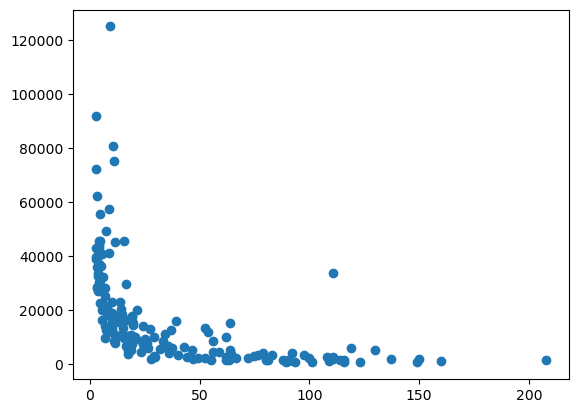

In [4]:
plt.scatter(df["child_mort"], df["income"])

In [5]:
df = df - np.mean(df,axis=0)
df = df / np.std(df,axis=0)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [6]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


In [7]:
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X.iloc[indices].values

In [8]:
def assign_clusters(X, centroids):
    clusters = [] #clusters contain array of all datapoints indicating what cluster they belong to
    for point in X.values:
        distances = [] # Initialize distances for each point
        for c in centroids:
           distances.append(euclidean_distance(point, c))
        cluster_id = np.argmin(distances) # index of the shortest distance.
        clusters.append(cluster_id) # each data point assigned to a cluster based on the value of .
    return np.array(clusters)

In [9]:
def update_centroids(X, clusters, k):
   new_centroids = []
   for i in range(k):
    centroid = np.mean(X[clusters == i], axis=0)
    new_centroids.append(centroid.values) # Convert pandas Series to numpy array
   return np.array(new_centroids)

In [10]:
def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)

        # check convergence
        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tol:
            break

        centroids = new_centroids

    return clusters, centroids


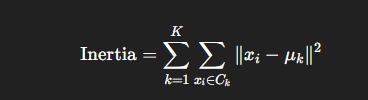

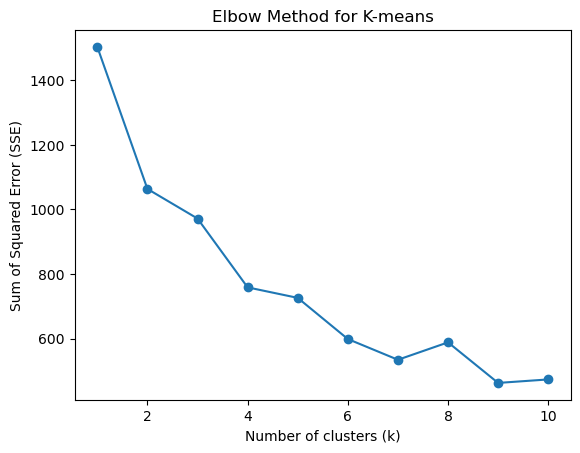

In [11]:
def compute_sse(X, clusters, centroids):
    sse = 0.0
    for i, point in enumerate(X.values):
        centroid = centroids[clusters[i]]
        sse += np.sum((point - centroid) ** 2)
    return sse


def elbow_sse(X, k_values):
    sse_values = []

    for k in k_values:
        clusters, centroids = k_means(X, k)

        sse = compute_sse(X, clusters, centroids)
        sse_values.append(sse)

    return sse_values


import matplotlib.pyplot as plt

k_values = range(1, 11)
sse_values = elbow_sse(df, k_values)

plt.plot(k_values, sse_values, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Error (SSE)")
plt.title("Elbow Method for K-means")
plt.show()

In [12]:
def get_inter_cluster_distance(centroids):
  distance=[]
  for i in centroids:
    for j in centroids:
      distance.append(euclidean_distance(i,j))
  return distance

def get_intra_cluster_distance(X, clusters):
    intra_distances = []

    for i in np.unique(clusters):
        cluster_points = X[clusters == i]
        n = len(cluster_points)

        # clusters with 0 or 1 point have 0 diameter
        if n < 2:
            intra_distances.append(0)
            continue

        max_dist = 0
        for a in range(n):
            for b in range(a + 1, n):
                dist = euclidean_distance(cluster_points.iloc[a].values, cluster_points.iloc[b].values)
                max_dist = max(max_dist, dist)

        intra_distances.append(max_dist)

    return np.array(intra_distances)

def get_dunn_index(X, clusters, centroids) :
    inter_distances = get_inter_cluster_distance(centroids)
    intra_distances = get_intra_cluster_distance(X, clusters)
    max_inter_distance = np.max(inter_distances)
    min_intra_distance = np.min(intra_distances)
    return min_intra_distance / max_inter_distance

In [13]:
def calculate_inertia(X, clusters, centroids):
    inertia = 0
    for i in range(len(np.unique(clusters))):
        cluster_points = X[clusters == i]

        inertia = inertia + np.sum((cluster_points.values - centroids[i]) ** 2)  # or use manhatten distance.
    return inertia

In [14]:
def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    inertia_history = []
    dunn_index_history = []
    centroid_history = []

    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)


        current_inertia = calculate_inertia(X, clusters, centroids)
        current_dunn_index = get_dunn_index(X, clusters, centroids)
        inertia_history.append(current_inertia)
        dunn_index_history.append(current_dunn_index)
        centroid_history.append(centroids.copy())



        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tol:
            break



    return clusters, centroids, inertia_history, dunn_index_history,centroid_history

In [16]:
clusters, centroids, inertia_history, dunn_index_history, centroid_history = k_means(df, k=3)

print("Iteration-wise Inertia and Dunn Index for k=3:")
for i, (inertia, dunn_index) in enumerate(zip(inertia_history, dunn_index_history)):
    print(f"Iteration {i+1}: Inertia = {inertia:.4f}, Dunn Index = {dunn_index:.4f}")

Iteration-wise Inertia and Dunn Index for k=3:
Iteration 1: Inertia = 1430.5130, Dunn Index = 1.2609
Iteration 2: Inertia = 1024.0577, Dunn Index = 1.4764
Iteration 3: Inertia = 1011.9381, Dunn Index = 1.4508
Iteration 4: Inertia = 996.7577, Dunn Index = 1.4777
Iteration 5: Inertia = 990.1705, Dunn Index = 1.4181
Iteration 6: Inertia = 979.8441, Dunn Index = 1.3415
Iteration 7: Inertia = 971.8758, Dunn Index = 1.0942


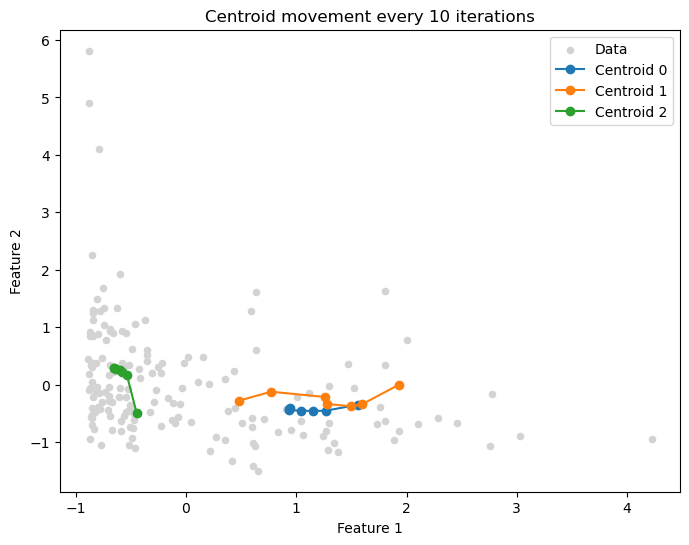

In [18]:
import matplotlib.pyplot as plt

def plot_centroid_movement(X, centroid_history):
    plt.figure(figsize=(8, 6))

    # plot data points
    plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Data")

    centroid_history = np.array(centroid_history)
    k = centroid_history.shape[1]

    for i in range(k):
        plt.plot(
            centroid_history[:, i, 0],
            centroid_history[:, i, 1],
            marker="o",
            label=f"Centroid {i}"
        )

    plt.title("Centroid movement every 10 iterations")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


plot_centroid_movement(df.values,centroid_history)

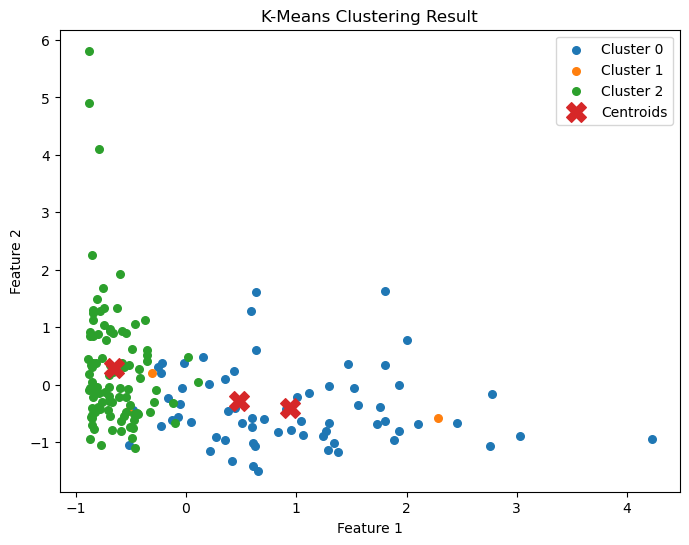

In [19]:
def plot_clusters(X, clusters, centroids):
    plt.figure(figsize=(8, 6))

    k = len(centroids)

    for i in range(k):
        points = X[clusters == i]
        plt.scatter(
            points[:, 0],
            points[:, 1],
            s=30,
            label=f"Cluster {i}"
        )

    # plot centroids
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        s=200,
        marker="X",
        label="Centroids"
    )

    plt.title("K-Means Clustering Result")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show() 


plot_clusters(df.values, clusters, centroids)